<a href="https://colab.research.google.com/github/leoxiang66/machine-learning/blob/MLO/homework/homework2_P2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal
from matplotlib import pyplot as plt

In [2]:
n = 100

In [3]:
uniform_dist = Uniform(torch.tensor([-1.0]), torch.tensor([1.0]))
X = uniform_dist.sample(torch.Size([n]))

In [4]:
z = Normal(0,1)

In [5]:
X.shape

torch.Size([100, 1])

In [6]:
X[0][0]

tensor(-0.2343)

In [7]:
y_star = torch.Tensor([x[0]+1 for x in X])

In [8]:
y = torch.Tensor([x + z.sample() for x in y_star])

In [9]:
y.shape

torch.Size([100])

In [10]:
y[0]

tensor(1.3479)

In [11]:
import torch
import torch.nn as nn


def compute_lse(X,y):
    tmp = torch.matmul(X.T, X)
    tmp = torch.inverse(tmp)
    tmp = torch.matmul(tmp,X.T)
    tmp = torch.matmul(tmp,y)

    return tmp.T

class PolynomialRegression(nn.Module):
    def __init__(self, dim: int, output_dim: int) -> None:
        super().__init__()
        if dim < 0 or output_dim <0:
            raise RuntimeError(f"You entered invalid dimension:{dim}")
        self.dim = dim
        self.linear = nn.Linear(dim+1,output_dim, bias=False)
    @classmethod
    def pd(cls,x,dim):
        '''
        x: scalar
        return: [1, x, x**2, ..., x**dim]
        '''
        result = [1]
        for i in range(dim):
            result.append(torch.pow(x,(i+1)))
        return torch.Tensor(result)
    @classmethod
    def build_X(cls,x,dim:int):
        '''
        return N,dim+1
        '''
        shape = x.shape

        # N
        if len(shape) == 1:
            X = torch.stack([cls.pd(t,dim) for t in x], dim=0)

        # N,1
        elif len(shape) == 2 and shape[1] == 1:
            X = torch.stack([cls.pd(t[0],dim) for t in x], dim=0)
        else:
            raise NotImplementedError('This shape of X is not implemented yet.')

        return X
        

    
    def forward(self,x):
        '''
        x: N or (N,1)
        '''

        # X: N,D+1
        return self.linear(self.build_X(x,self.dim))

    @classmethod
    def least_square_estimate(cls, X, y,dim):
        return compute_lse(cls.build_X(X,dim), y)

    def fit_lse(self,X,y):
        lse = self.least_square_estimate(X,y,self.dim).view((1,-1))
        self.linear.weight = nn.Parameter(lse)




            
        

In [12]:
poly = PolynomialRegression(dim = 2, output_dim=1)

In [13]:
poly.fit_lse(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  # This is added back by InteractiveShellApp.init_path()


In [14]:
y_lse = poly(X).flatten()
y_lse.shape

torch.Size([100])

In [15]:
poly.pd(X[0][0], 5)

tensor([ 1.0000e+00, -2.3425e-01,  5.4874e-02, -1.2854e-02,  3.0112e-03,
        -7.0537e-04])

In [16]:
tmp = poly.build_X(X,5)
tmp.shape

torch.Size([100, 6])

# loss function

In [17]:
loss_fn = torch.nn.MSELoss() 

# iterating dimension D

In [18]:
d_max = 10
losses = []
dimensions = [d for d in range(1,d_max)]

In [19]:
print(dimensions)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


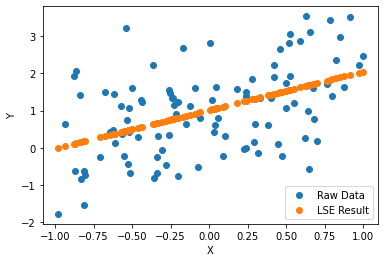

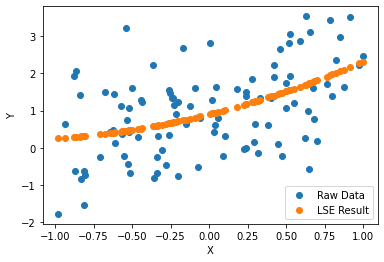

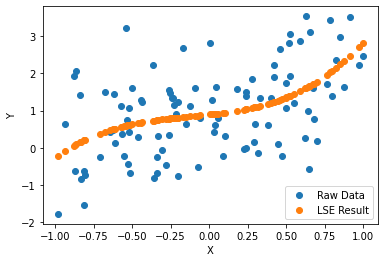

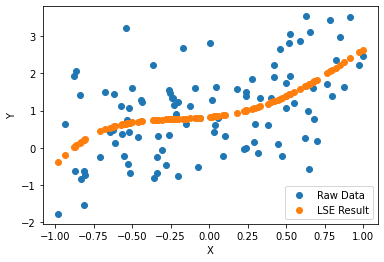

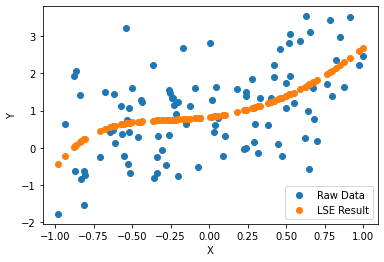

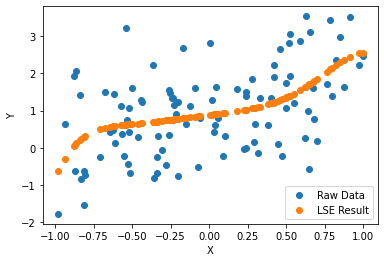

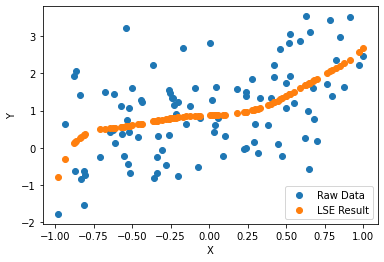

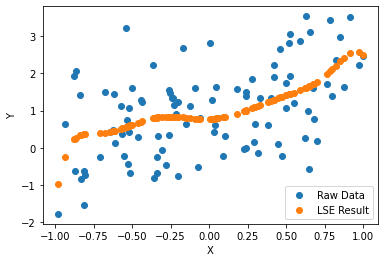

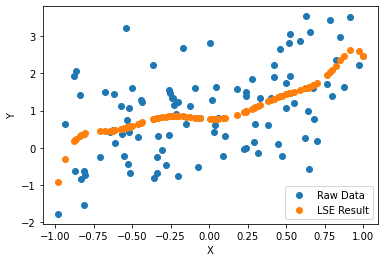

In [20]:
for d in dimensions:
    poly = PolynomialRegression(d,1)
    poly.fit_lse(X,y)
    y_hat = poly(X).flatten()
    loss = loss_fn(y_hat,y_star).item()
    losses.append(loss)

    plt.scatter(x=X,y=y, label = 'Raw Data')
    plt.scatter(x=X,y=y_hat.detach().numpy(),label = 'LSE Result')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

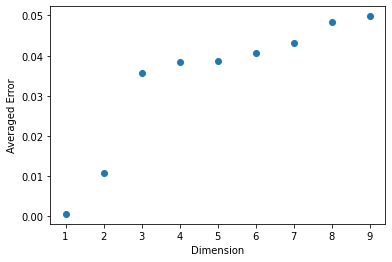

In [21]:
plt.scatter(x=dimensions,y=losses)
plt.xlabel('Dimension')
plt.ylabel('Averaged Error')
plt.show()

# iterating N

In [22]:
dim = 5

In [23]:
ns = list(range(2**4,2**8,1))

In [24]:
losses = []

In [25]:
for n in ns:
    uniform_dist = Uniform(torch.tensor([-1.0]), torch.tensor([1.0]))
    X = uniform_dist.sample(torch.Size([n]))
    z = Normal(0,1)
    y_star = torch.Tensor([x[0]+1 for x in X])
    y = torch.Tensor([x + z.sample() for x in y_star])  

    poly = PolynomialRegression(dim,1)
    poly.fit_lse(X,y)
    y_hat = poly(X).flatten()
    loss = loss_fn(y_hat,y_star).item()
    losses.append(loss)



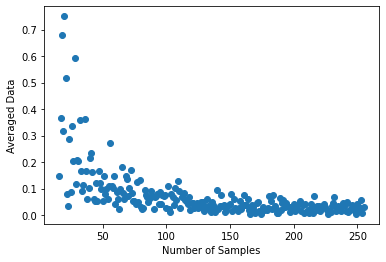

In [26]:
from matplotlib import pyplot as plt
plt.scatter(x=ns,y=losses)
plt.xlabel('Number of Samples')
plt.ylabel('Averaged Data')
plt.show()